<a href="https://colab.research.google.com/github/VardhanYadav/Cleanest-City-Prediction-Model/blob/main/Clean_City_oneDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install intel-tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: google-auth-oauthlib
    Found existing ins

In [ ]:
!pip uninstall tensorflow keras ml-dtypes tensorboard -y

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
Found existing installation: keras 3.5.0
Uninstalling keras-3.5.0:
  Successfully uninstalled keras-3.5.0
Found existing installation: ml-dtypes 0.4.1
Uninstalling ml-dtypes-0.4.1:
  Successfully uninstalled ml-dtypes-0.4.1
Found existing installation: tensorboard 2.17.1
Uninstalling tensorboard-2.17.1:
  Successfully uninstalled tensorboard-2.17.1


In [ ]:
!pip install tensorflow==2.17.0 keras==3.2.0 ml-dtypes==0.3.1 tensorboard==2.17.0

  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached tensorboard-2.17.0-py3-none-any.whl.metadata (1.6 kB)
Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.7/206.7 kB 18.4 MB/s eta 0:00:00
Using cached tensorboard-2.17.0-py3-none-any.whl (5.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
intel-tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 3.2.0 which is incompatible.
intel-tensorflow 2.14.0 requires ml-dtypes==0.2.0, but you have ml-dtypes 0.3.1 which is incompatible.
intel-tensorflow 2.14.0 requires tensorboard<2.15,>=2.14, but you have tensorboard 2.17.0 which is incompatible.


In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cleanest_Cities_India.csv to Cleanest_Cities_India.csv


In [ ]:
data = pd.read_csv("Cleanest_Cities_India.csv")



In [ ]:
X = data[['2016_Score', '2017_Score', '2018_Score', '2019_Score_5000', '2020_Score_Max6000', '2022_Score_Max7500', '2023_Score_Max10000']]
y = data['2024_Score_Predicted'] = data['2023_Score_Max10000'] + (data['2023_Score_Max10000'] - data['2016_Score']) / 7

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model_oneDNN = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),  # Increase neurons
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# Compile the model with a custom learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Try lower learning rates
model_oneDNN.compile(optimizer=optimizer, loss='mean_squared_error',metrics=['mae'])


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
history = model_oneDNN.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 3922492.7500 - mae: 549.4318 - val_loss: 6366785.0000 - val_mae: 736.0610
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3390087.2500 - mae: 436.4969 - val_loss: 6336568.0000 - val_mae: 735.7055
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5600765.5000 - mae: 708.0753 - val_loss: 6255436.5000 - val_mae: 734.2974
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3357814.5000 - mae: 466.7937 - val_loss: 6061056.0000 - val_mae: 730.1328
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2382181.2500 - mae: 355.5426 - val_loss: 5695189.0000 - val_mae: 720.1485
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3798935.2500 - mae: 558.6487 - val_loss: 4986622.5000 - val_mae: 697.2697
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2235980.2500 - mae: 408.0298 - val_loss: 3983592.0000 - val_mae: 652.7287
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2572230.2

In [ ]:
y_pred_oneDNN = model_oneDNN.predict(X_test_scaled)
r2_oneDNN = r2_score(y_test, y_pred_oneDNN)
print(f"oneDNN R² score: {r2_oneDNN:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
oneDNN R² score: 0.9896


In [ ]:
import matplotlib.pyplot as plt

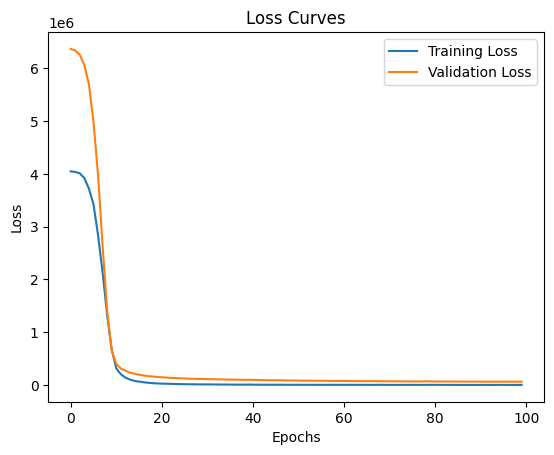

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()